In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt 

In [2]:
Algerian_forest_fire_df= pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
Algerian_forest_fire_df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
Algerian_forest_fire_df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [4]:
Algerian_forest_fire_df=Algerian_forest_fire_df.iloc[:,3:]

In [5]:
Algerian_forest_fire_df.Classes.value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [6]:
Algerian_forest_fire_df['Classes']= Algerian_forest_fire_df['Classes'].apply(lambda x:x.strip())

In [7]:
from sklearn.preprocessing import LabelEncoder

LE= LabelEncoder()

In [8]:
Algerian_forest_fire_df['Classes']=LE.fit_transform(Algerian_forest_fire_df['Classes'])

In [9]:
Algerian_forest_fire_df.Classes.value_counts()

Classes
0    137
1    106
Name: count, dtype: int64

In [10]:
Algerian_forest_fire_df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


In [11]:
Algerian_forest_fire_df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,-0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,-0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,-0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,-0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,-0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,-0.719216,0.197102


<Axes: >

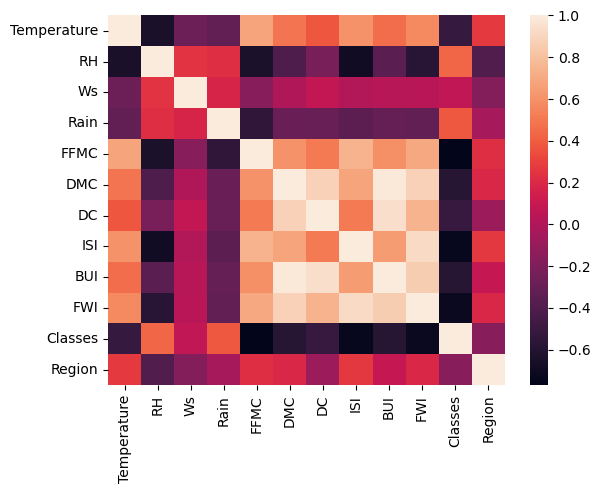

In [12]:
sn.heatmap(Algerian_forest_fire_df.corr())

<Axes: ylabel='FWI'>

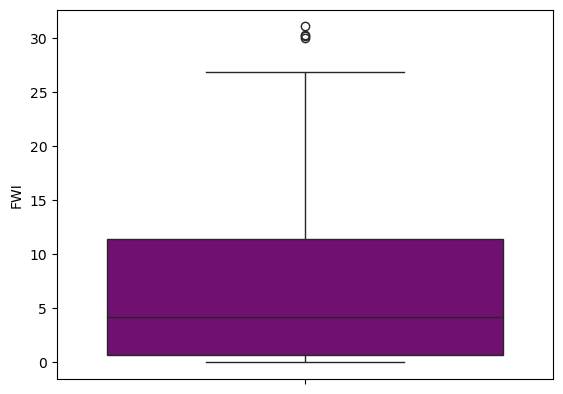

In [13]:
### Box Plot
### FWI is our target variable
sn.boxplot(Algerian_forest_fire_df['FWI'], color= 'purple')

In [14]:
###### Independent and dependent features
Y = Algerian_forest_fire_df['FWI']
X = Algerian_forest_fire_df.drop('FWI', axis=1)

In [15]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test= train_test_split(X, Y, random_state=42, train_size= 0.75)



In [16]:
### Feature Selection Based on Corr

X_Train.corr()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,-0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,-0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,-0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,-0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,-0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,-0.612239,0.114897
Classes,-0.542141,0.456876,0.082570,0.369357,-0.781259,-0.617273,-0.543581,-0.742977,-0.612239,1.000000,-0.188837


<Axes: >

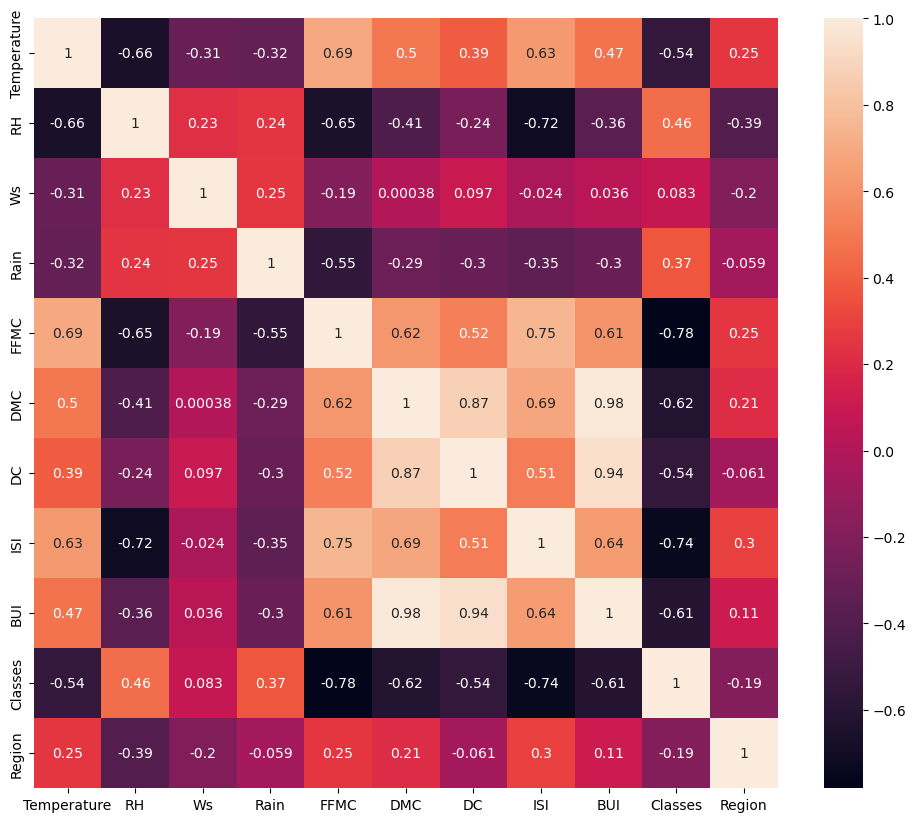

In [17]:
plt.figure(figsize=(12,10))
sn.heatmap(X_Train.corr(), annot=True)

In [18]:
### check for Multi Colinearity

#### Method to check 
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs (corr_matrix.iloc[i,j])> threshold:
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [19]:
### Threshold is settup by Project Manager
core_feattures =correlation(X_Train, 0.85)

In [20]:
### Drop Feature

X_Train.drop(core_feattures, axis=1, inplace= True)### Drop Feature

X_Test.drop(core_feattures, axis=1, inplace= True)


In [21]:
########## Feature Scaling or Standardization

from sklearn.preprocessing import StandardScaler

Sc = StandardScaler()

In [22]:
X_Train= Sc.fit_transform(X_Train)
X_Test= Sc.transform(X_Test)

<Axes: >

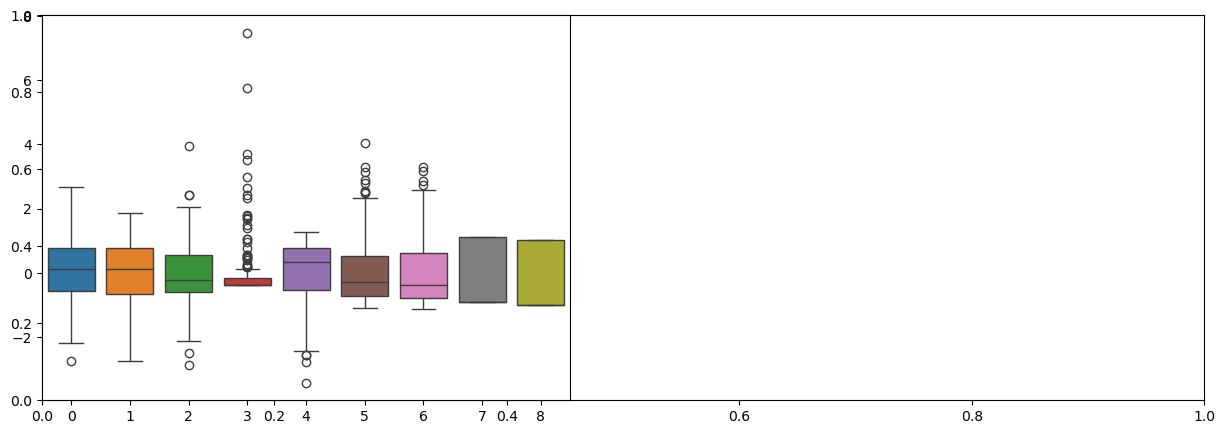

In [23]:
###### Box Plots to Understamd Effect of Stamdard Scaler

plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sn.boxplot(data=X_Train)

Mean Absolute Error  0.5468236465249979
R2 Score  0.9847657384266951


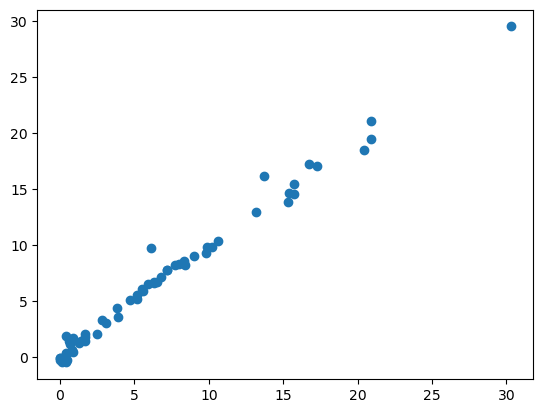

In [24]:
###### Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

LrModel= LinearRegression()

LrModel.fit(X_Train, Y_Train)

y_Pred=LrModel.predict(X_Test)

residuals= Y_Test-y_Pred

mae= mean_absolute_error(Y_Test, y_Pred)
r2=r2_score(Y_Test, y_Pred)
mse= mean_squared_error(Y_Test, y_Pred)

print('Mean Absolute Error ', mae)
print('R2 Score ', r2)



##### Should follow a Linear Regression
plt.scatter(Y_Test, y_Pred)

In [25]:
residuals

24     0.176595
6     -0.552529
152    0.754117
232   -0.555893
238   -0.191359
         ...   
162    0.157949
178   -0.017026
224    0.272668
230    0.782918
154    0.019510
Name: FWI, Length: 61, dtype: float64

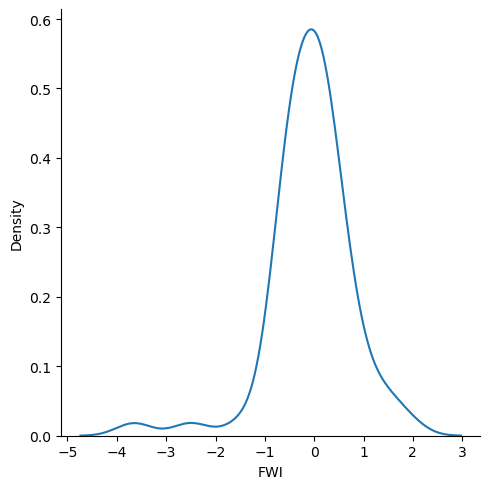

In [26]:
sn.displot(residuals, kind='kde')

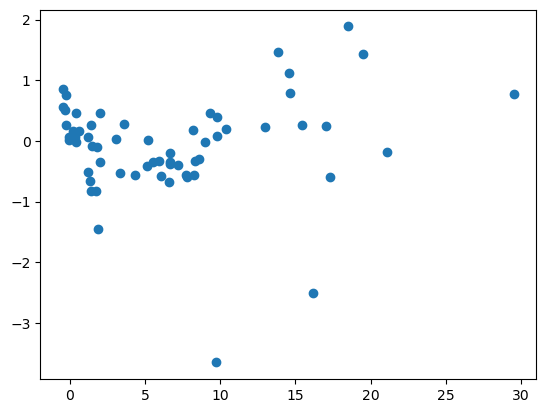

In [27]:
plt.scatter(y_Pred, residuals)

Mean Absolute Error  1.1331759949144085
R2 Score  0.9492020263112388


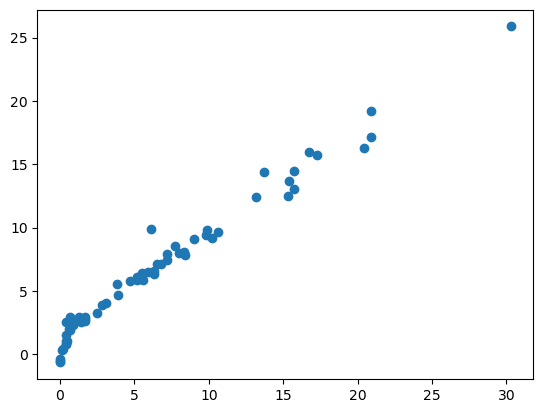

In [28]:
############# Lasso Regression


from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

Lasso= Lasso()

Lasso.fit(X_Train, Y_Train)

y_Pred=Lasso.predict(X_Test)

residuals= Y_Test-y_Pred

mae= mean_absolute_error(Y_Test, y_Pred)
r2=r2_score(Y_Test, y_Pred)
mse= mean_squared_error(Y_Test, y_Pred)

print('Mean Absolute Error ', mae)
print('R2 Score ', r2)



##### Should follow a Linear Regression
plt.scatter(Y_Test, y_Pred)

Mean Absolute Error  0.5642305340105692
R2 Score  0.9842993364555513


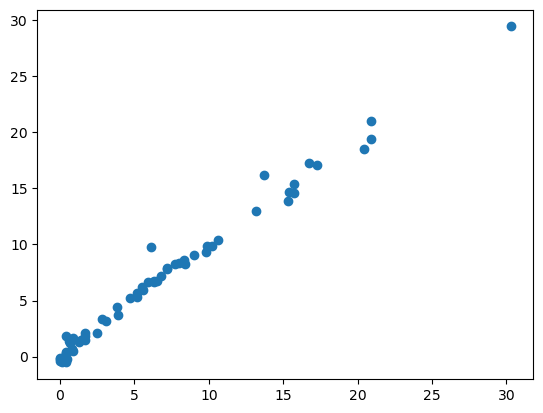

In [29]:
############# Ridge Regression


from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

Ridge= Ridge()

Ridge.fit(X_Train, Y_Train)

y_Pred=Ridge.predict(X_Test)

residuals= Y_Test-y_Pred

mae= mean_absolute_error(Y_Test, y_Pred)
r2=r2_score(Y_Test, y_Pred)
mse= mean_squared_error(Y_Test, y_Pred)

print('Mean Absolute Error ', mae)
print('R2 Score ', r2)



##### Should follow a Linear Regression
plt.scatter(Y_Test, y_Pred)

Mean Absolute Error  1.8822353634896
R2 Score  0.8753460589519703


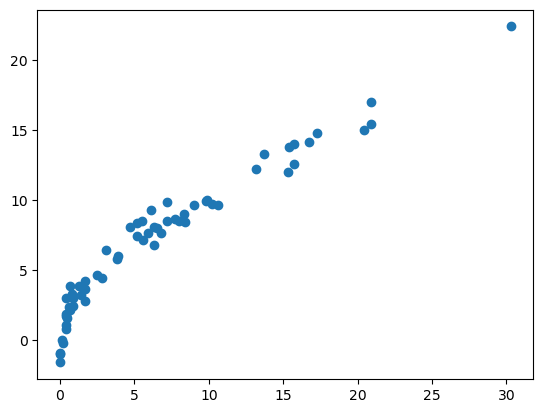

In [30]:
############# Elastic Net

from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

ElasticNet= ElasticNet()

ElasticNet.fit(X_Train, Y_Train)

y_Pred=ElasticNet.predict(X_Test)

residuals= Y_Test-y_Pred

mae= mean_absolute_error(Y_Test, y_Pred)
r2=r2_score(Y_Test, y_Pred)
mse= mean_squared_error(Y_Test, y_Pred)

print('Mean Absolute Error ', mae)
print('R2 Score ', r2)



##### Should follow a Linear Regression
plt.scatter(Y_Test, y_Pred)

In [31]:
Sc

StandardScaler()

In [32]:
Ridge

Ridge()

In [33]:
#### Pickle

import pickle 

pickle.dump(Sc, open('scaler.pkl', 'wb'))
pickle.dump(Ridge, open('ridge.pkl', 'wb'))

